In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from models.url_ml_catboost_classifier import SingletonURLMLCatBoostClassifier
from models.url_ml_desicion_tree_classifier import SingletonURLMLDecisionTreeClassifier
from models.url_ml_gradient_boosting_classifier import (
    SingletonURLMLGradientBoostingClassifier,
)
from models.url_ml_knn_classifier import SingletonURLMLKNNClassifier
from models.url_ml_logistic_regression_classifier import (
    SingletonURLMLLogisticRegressionClassifier,
)
from models.url_ml_mlp_classifier import SingletonURLMLMLPClassifier
from models.url_ml_naive_bayes_classifier import SingletonURLMLNaiveBayesClassifier
from models.url_ml_random_forest import SingletonURLMLRandomForestClassifier
from models.url_ml_svm_classifier import SingletonURLMLSVMClassifier
from utils.url_utils import load_data_from_csv

/Users/ngosangns/Github/spam-sms-detector-1123/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def evaluate_classifiers(classifiers, X_train, Y_train, X_test, Y_test, is_training):
    accuracies = []
    for classifier in classifiers:
        if is_training:
            classifier.train(X_train.copy(), Y_train.copy())
            classifier.save()
        else:
            classifier.load()

        print(f"Evaluating {classifier.model_name}...")
        Y_pred = classifier.predict(X_test.copy())
        accuracy = accuracy_score(Y_test.copy(), Y_pred)
        print(f"Accuracy: {accuracy}")
        accuracies.append(accuracy * 100)
    return accuracies


def plot_accuracies(model_names, accuracies):
    plt.figure(figsize=(12, 6))
    plt.bar(model_names, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Comparison")
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha="center", va="bottom")
    plt.show()

Evaluating svm...
Accuracy: 0.9642695612844867
Evaluating naive-bayes...
Accuracy: 0.6047037539574853
Evaluating random-forest...
Accuracy: 0.9651741293532339
Evaluating logistic-regression...
Accuracy: 0.9335142469470827
Evaluating knn...
Accuracy: 0.9561284486657621
Evaluating gradient-boosting...
Accuracy: 0.9742198100407056
0:	learn: 0.5487237	total: 61ms	remaining: 1m
1:	learn: 0.4349354	total: 63.2ms	remaining: 31.5s
2:	learn: 0.3609245	total: 65.5ms	remaining: 21.8s
3:	learn: 0.3050830	total: 67.5ms	remaining: 16.8s
4:	learn: 0.2766622	total: 70.6ms	remaining: 14.1s
5:	learn: 0.2475478	total: 72.6ms	remaining: 12s
6:	learn: 0.2286636	total: 75.3ms	remaining: 10.7s
7:	learn: 0.2138756	total: 77.7ms	remaining: 9.63s
8:	learn: 0.2013642	total: 79.7ms	remaining: 8.78s
9:	learn: 0.1896379	total: 81.6ms	remaining: 8.08s
10:	learn: 0.1819537	total: 84.6ms	remaining: 7.61s
11:	learn: 0.1767868	total: 87.3ms	remaining: 7.18s
12:	learn: 0.1727735	total: 89.1ms	remaining: 6.77s
13:	learn: 

/Users/ngosangns/Github/spam-sms-detector-1123/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


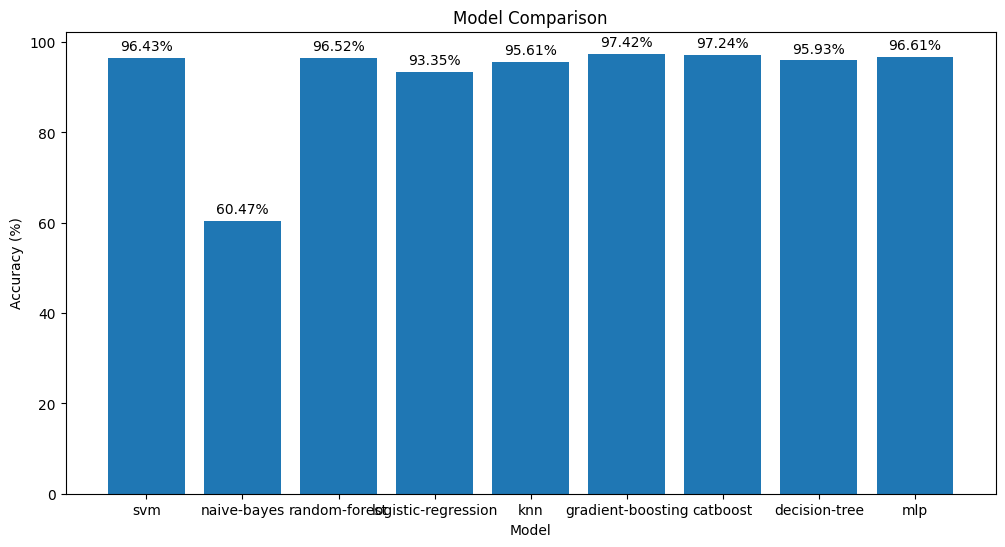

In [ ]:
URL_CSV_PATH = "./data/url-data.csv"
MODEL_DIR = "./trained_models"
IS_TRAINING = True

classifiers = [
    SingletonURLMLSVMClassifier(MODEL_DIR),
    SingletonURLMLRandomForestClassifier(MODEL_DIR),
    SingletonURLMLLogisticRegressionClassifier(MODEL_DIR),
    SingletonURLMLKNNClassifier(MODEL_DIR),
    SingletonURLMLGradientBoostingClassifier(MODEL_DIR),
    SingletonURLMLCatBoostClassifier(MODEL_DIR),
    SingletonURLMLDecisionTreeClassifier(MODEL_DIR),
    SingletonURLMLMLPClassifier(MODEL_DIR),

    # Low accuracy models
    # SingletonURLMLNaiveBayesClassifier(MODEL_DIR),
]
model_names = [classifier.model_name for classifier in classifiers]

X, Y = load_data_from_csv(URL_CSV_PATH)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

accuracies = evaluate_classifiers(
    classifiers, X_train, Y_train, X_test, Y_test, IS_TRAINING
)
plot_accuracies(model_names, accuracies)